## Descriptive analysis of United States air quality data

* Use of public dataframes from the years 2019 and 2023, with information from records of the presence of pollutants (ozone, carbon monoxide, sulfur dioxide and nitrogen dioxide) in the air in the United States, available at the link: https://aqs. epa.gov/aqsweb/airdata/download_files.html


* For this analysis, the Tables of Daily and Daily Summary Data option was accessed and information from the years 2019 and 2023 was used.


* To better understand the dataframe fields, the documentation was consulted via the link https://aqs.epa.gov/aqsweb/airdata/FileFormats.html and based on item 5 (Daily Summary Files).


* To classify air quality values, information from the following link is being used as a basis: https://www.airnow.gov/aqi/aqi-basics/Use of public dataframes from the years 2019 and 2023, with information from records of the presence of pollutants (ozone, carbon monoxide, sulfur dioxide and nitrogen dioxide) in the air in the United States, available at the link: https://aqs. epa.gov/aqsweb/airdata/download_files.html


* For this analysis, the Tables of Daily and Daily Summary Data option was accessed and information from the years 2019 and 2023 was used.


* To better understand the dataframe fields, the documentation was consulted via the link https://aqs.epa.gov/aqsweb/airdata/FileFormats.html and based on item 5 (Daily Summary Files).


* To classify air quality values, information from the following link is being used as a basis: https://www.airnow.gov/aqi/aqi-basics/

#### Importing pandas, numpy, seaborn, matplot and scipy.stats libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kstest

#### Configuration so that all dataframe columns are displayed

In [3]:
pd.set_option('display.max_columns', None)

#### Reading databases

In [52]:
# 2019
ozone_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_44201_2019.csv')
co_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42101_2019.csv')
so2_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42401_2019.csv')
no2_2019 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42602_2019.csv')

# 2023
ozone_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_44201_2023.csv')
co_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42101_2023.csv')
so2_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42401_2023.csv')
no2_2023 = pd.read_csv(r'C:\Users\je_gr\Documents\Unisinos\2.Introdução a Python\Mod4\daily_42602_2023.csv')

## Treatment of 2019 and 2023 dataframes regarding pollutants: 
* ozone
* carbon monoxide
* sulfur dioxide
* nitrogen dioxide

### OZONE (O3)

* Eliminating rows that do not contain an AQI (Air Quality Index) value
* Adding Year and Month columns
* Adding 1st Max Value AQI column

In [53]:
# 2019
ozone_2019 = ozone_2019.loc[ozone_2019['AQI']>=0]
ozone_2019['Date Local'] = pd.to_datetime(ozone_2019['Date Local'], format='%Y/%m/%d')
ozone_2019['Year'] = ozone_2019['Date Local'].dt.year
ozone_2019['Month'] = ozone_2019['Date Local'].dt.month
ozone_2019['Month'] = pd.cut(ozone_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# transformando os valores da coluna "1st Max Value" para inteiro e mantendo o mesmo padrão da coluan AQI
ozone_2019['1st Max Value AQI'] = round((ozone_2019['1st Max Value'] * 1000), 0)
ozone_2019['1st Max Value AQI'] = ozone_2019['1st Max Value AQI'].astype(int)

# 2023
ozone_2023 = ozone_2023.loc[ozone_2023['AQI']>=0]
ozone_2023['Date Local'] = pd.to_datetime(ozone_2023['Date Local'], format='%Y/%m/%d')
ozone_2023['Year'] = ozone_2023['Date Local'].dt.year
ozone_2023['Month'] = ozone_2023['Date Local'].dt.month
ozone_2023['Month'] = pd.cut(ozone_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# transformando os valores da Arithmetic Mean AQI para inteiro e mantendo o mesmo padrão da coluan AQI
ozone_2023['1st Max Value AQI'] = round((ozone_2023['1st Max Value'] * 1000), 0)
ozone_2023['1st Max Value AQI'] = ozone_2023['1st Max Value AQI'].astype(int)

### CARBON MONOXIDE (CO)

* Adding Year and Month columns
* Adding 1st Max Value AQI column

In [54]:
# 2019
co_2019['Date Local'] = pd.to_datetime(co_2019['Date Local'], format='%Y/%m/%d')
co_2019['Year'] = co_2019['Date Local'].dt.year
co_2019['Month'] = co_2019['Date Local'].dt.month
co_2019['Month'] = pd.cut(co_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# transformando os valores da coluna "1st Max Value" para inteiro e mantendo o mesmo padrão da coluan AQI
co_2019['1st Max Value AQI'] = round((co_2019['1st Max Value'] * 1000), 0)
co_2019['1st Max Value AQI'] = co_2019['1st Max Value AQI'].astype(int)

# 2023
co_2023['Date Local'] = pd.to_datetime(co_2023['Date Local'], format='%Y/%m/%d')
co_2023['Year'] = co_2023['Date Local'].dt.year
co_2023['Month'] = co_2023['Date Local'].dt.month
co_2023['Month'] = pd.cut(co_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# transformando os valores da coluna "1st Max Value" para inteiro e mantendo o mesmo padrão da coluan AQI
co_2023['1st Max Value AQI'] = round((co_2023['1st Max Value'] * 1000), 0)
co_2023['1st Max Value AQI'] = co_2023['1st Max Value AQI'].astype(int)

### ENXOPHRE DIOXIDE (SO2)

* Eliminating rows that do not contain an AQI (Air Quality Index) value
* Adding Year and Month columns

In [55]:
# 2019
so2_2019 = so2_2019.loc[so2_2019['AQI']>=0]
so2_2019['Date Local'] = pd.to_datetime(so2_2019['Date Local'], format='%Y/%m/%d')
so2_2019['Year'] = so2_2019['Date Local'].dt.year
so2_2019['Month'] = so2_2019['Date Local'].dt.month
so2_2019['Month'] = pd.cut(so2_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 2023
so2_2023 = so2_2023.loc[so2_2023['AQI']>=0]
so2_2023['Date Local'] = pd.to_datetime(so2_2023['Date Local'], format='%Y/%m/%d')
so2_2023['Year'] = so2_2023['Date Local'].dt.year
so2_2023['Month'] = so2_2023['Date Local'].dt.month
so2_2023['Month'] = pd.cut(so2_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

### NITROGEN DIOXIDE (NO2)

* Eliminating rows that do not contain an AQI (Air Quality Index) value
* Adding Year and Month columns
* Adding Column with air quality category

In [56]:
# 2019
no2_2019 = ozone_2019.loc[ozone_2019['AQI']>=0]
no2_2019['Date Local'] = pd.to_datetime(no2_2019['Date Local'], format='%Y/%m/%d')
no2_2019['Year'] = no2_2019['Date Local'].dt.year
no2_2019['Month'] = no2_2019['Date Local'].dt.month
no2_2019['Month'] = pd.cut(no2_2019['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# 2023
no2_2023 = no2_2023.loc[no2_2023['AQI']>=0]
no2_2023['Date Local'] = pd.to_datetime(no2_2023['Date Local'], format='%Y/%m/%d')
no2_2023['Year'] = no2_2023['Date Local'].dt.year
no2_2023['Month'] = no2_2023['Date Local'].dt.month
no2_2023['Month'] = pd.cut(no2_2023['Month'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                             labels=['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

## <font color='green'> Data analysis: </font> Ozone

#### Descriptive measures for the AQI column (valid values ​​only) 

In [57]:
# 2019
ozone_2019['AQI'].loc[ozone_2019['AQI']>=0].describe()

count    389890.000000
mean         39.084001
std          15.235792
min           0.000000
25%          31.000000
50%          38.000000
75%          44.000000
max         213.000000
Name: AQI, dtype: float64

In [58]:
# 2023
ozone_2023['AQI'].loc[ozone_2023['AQI']>=0].describe()

count    212222.000000
mean         44.510635
std          18.222568
min           0.000000
25%          34.000000
50%          41.000000
75%          48.000000
max         217.000000
Name: AQI, dtype: float64

#### Check if my data in the AQI column has a normal distribution using the Kolmogorov-Smirnov test as I have more than 50 values

In [59]:
# 2019
stat, p_value = kstest(ozone_2019['AQI'], 'norm')

# comparing the p-value with a 0.05 significance level
if p_value > 0.05:
    print("The distribution is normal")
else:
    print("The distribution is not normal")

The distribution is not normal


#### Histogram to visualize the distribution of data in the AQI column in 2019

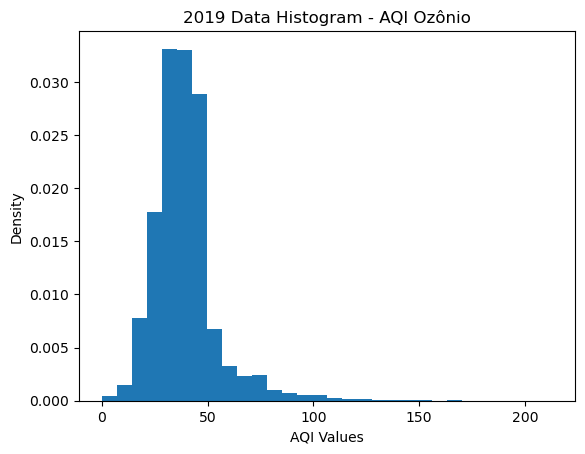

In [60]:
plt.hist(ozone_2019['AQI'], bins=30, density=True)
plt.title('2019 Data Histogram - AQI Ozônio')
plt.xlabel('AQI Values')
plt.ylabel('Density')
plt.show()

In [61]:
#2023
stat, p_value = kstest(ozone_2023['AQI'], 'norm')

# comparing the p-value with a 0.05 significance level
if p_value > 0.05:
     print("The distribution is normal")
else:
     print("The distribution is not normal")

The distribution is not normal


#### Histogram to visualize the distribution of data in the AQI column in the year 2023 

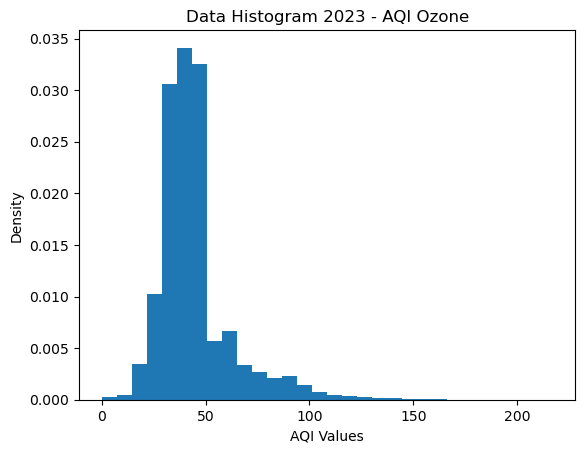

In [62]:
plt.hist(ozone_2023['AQI'], bins=30, density=True)
plt.title('Data Histogram 2023 - AQI Ozone')
plt.xlabel('AQI Values')
plt.ylabel('Density')
plt.show()

#### <font color='green'> __ANALYSIS__
    - The distribution of data in the AQI column of the 2019 and 2023 Ozônio dataframes are not normal distributions. Therefore, we will work with the median of these data.

#### Median AQI by state

In [63]:
# 2019
median2019 = ozone_2019.pivot_table(index='State Name', values='AQI', aggfunc='mean').round(2).reset_index()
# 2023
median2023 = ozone_2023.pivot_table(index='State Name', values='AQI', aggfunc='mean').round(2).reset_index()

# organization from highest value to lowest
median2019 = median2019.sort_values(by='AQI', ascending=False)
median2023 = median2023.sort_values(by='AQI', ascending=False)

#### Selection of the 5 states with the worst AQI medians - 2019

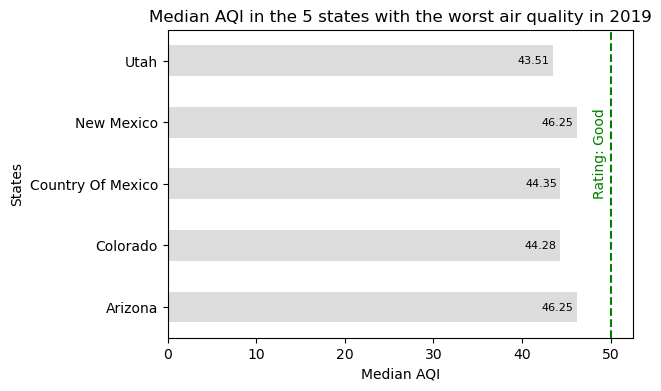

In [64]:
#2019

# sort the State Name column in alphabetical order
median2019_5worst = median2019.head(5).sort_values(by='State Name')

# graph
median2019_5worst.plot(kind='barh',figsize=(6, 4),color=(220/255, 220/255, 220/255),legend=None)

# labels, titles and captions
plt.title('Median AQI in the 5 states with the worst air quality in 2019',fontsize= 12)
plt.xlabel('Median AQI', fontsize= 10)
plt.ylabel('States', fontsize= 10)

# adding value sorting line
plt.axvline(x=50, color='g', linestyle='--')
plt.text(48, len(median2019_5worst)/2, f'Rating: Good', rotation=90, va='center', color='g')

# adding labels
for i, value in enumerate(median2019_5worst['AQI']):
 plt.text(value -4, i, str(round(value, 2)), ha='left', va='center', fontsize=8)

plt.yticks(np.arange(len(median2019_5worst['State Name'])), median2019_5worst['State Name'])

plt.show()

#### <font color='green'> __ANALYSIS__
    - All states have a median AQI below 50, classifying these states as Good in relation to air quality.

#### Selection of the 5 states with the worst AQI medians - 2023

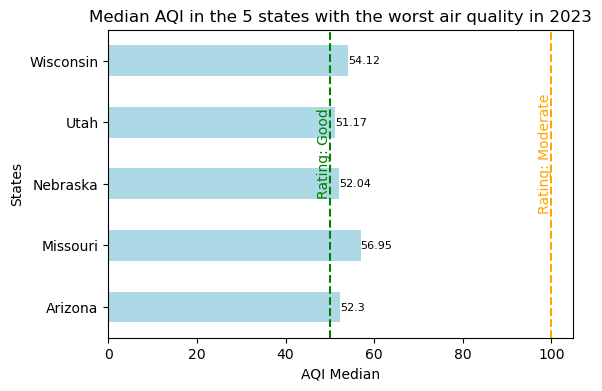

In [65]:
#2023

# sort the State Name column in alphabetical order
median2023_5worst = median2023.head(5).sort_values(by='State Name')

# graph
median2023_5worst.plot(kind='barh',figsize=(6, 4),color=(173/255, 216/255, 230/255),legend=None)

# labels, titles and caption
plt.title('Median AQI in the 5 states with the worst air quality in 2023',fontsize= 12)
plt.xlabel('AQI Median', fontsize= 10)
plt.ylabel('States', fontsize= 10)

# adding value sorting lines
plt.axvline(x=50, color='g', linestyle='--')
plt.axvline(x=100, color='orange', linestyle='--')
plt.text(47, len(median2023_5worst)/2, f'Rating: Good', rotation=90, va='center', color='g')
plt.text(97, len(median2023_5worst)/2, f'Rating: Moderate', rotation=90, va='center', color='orange')

# adding labels
for i, value in enumerate(median2023_5worst['AQI']):
 plt.text(value, i, str(value), ha='left', va='center', fontsize=8)

plt.yticks(np.arange(len(median2023_5worst['State Name'])), median2023_5worst['State Name'])

plt.show()

#### <font color='green'> __ANALYSIS__
    - All states have a median AQI above 50, classifying these states as Moderate in relation to air quality.

#### Comparison of values from the 5 states with the worst AQI medians in 2019 with values ​​from the same states in 2023 

In [66]:
# names of the top 5 states with the worst median AQI in 2019
states_worst_2019 = ['Arizona', 'New Mexico', 'Country Of Mexico', 'Colorado', 'Utah']

# Median AQI in the year 2023 of the states saved in the variable 'states_worst_2019'
median2019_5worst_in2023 = median2023[median2023['State Name'].isin(states_worst_2019)]
median2019_5worst_in2023 = median2019_5worst_in2023.sort_values(by='State Name')

# Collection of the median AQI of the same 5 states, but from the year 2023
median2019_5worst_in2023

,State Name,AQI
2,Arizona,52.30
5,Colorado,49.97
7,Country Of Mexico,43.49
31,New Mexico,46.71
45,Utah,51.17


#### Graph comparing the 5 worst AQI medians of 2019 with the value of the same states in 2023

Text(2.5, 51, 'Rating: Good')

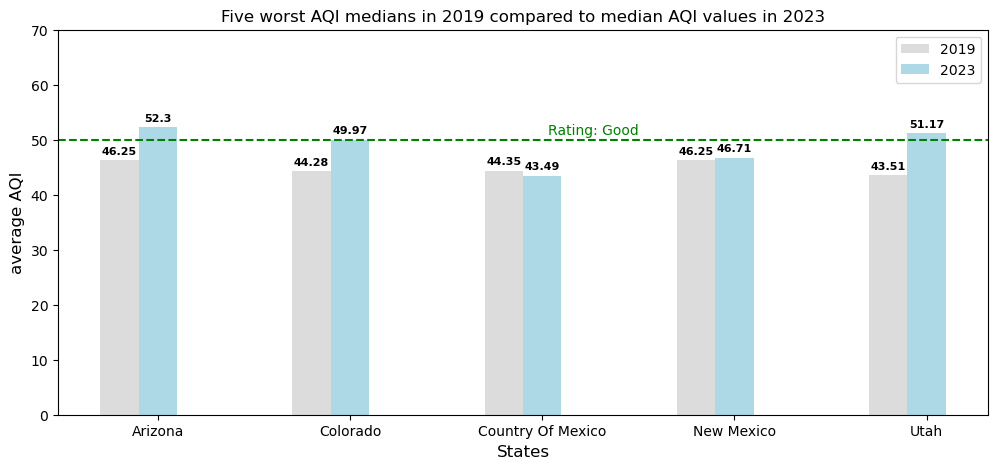

In [67]:
x=np.arange(5)

fig, ax = plt.subplots(figsize=(12,5))

# graph
m1 = ax.bar(x-0.2, median2019_5worst['AQI'], width=0.2, color=(220/255, 220/255, 220/255), alpha=1)
m2 = ax.bar(x, median2019_5worst_in2023['AQI'], width=0.2, color=(173/255, 216/255, 230/255), alpha=1)

ax.bar_label(m1, padding=3, fontsize=8, weight='bold')
ax.bar_label(m2, padding=3, fontsize=8, weight='bold')

# y-axis size/limit
ax.set_ylim(0, 70)

# labels, titles and caption
plt.xlabel('States', fontsize=12)
plt.ylabel('average AQI', fontsize=12)
plt.title('Five worst AQI medians in 2019 compared to median AQI values ​​in 2023')
plt.xticks(x,median2019_5worst['State Name'])
plt.legend(['2019', '2023'], fontsize=10)

# adding value sorting line
plt.axhline(y=50, color='g', linestyle='--')
plt.text(len(median2019_5worst)/2, 51, f'Rating: Good', ha='right', color='g')

#### <font color='green'> __ANALYSIS__
    - The states of Arizona and Utah had a median AQI above 50, which classifies them as Moderate in the air quality assessment.
    - Only in the state of Mexico City there was a decrease in the median of the pollutant Ozone in 2023 compared to 2019. All other states showed an increase in the average AQI in 2023 compared to 2019.

#### Merges data from the 5 states with the worst median AQI in 2019 and the median AQI of these same states in 2023

In [68]:
merge_5worst2019_2023 = pd.merge(median2019_5worst, median2019_5worst_in2023[['State Name', 'AQI']], on='State Name', how='left')

# adding a new comparison column for the difference in values ​​between the two years
merge_5worst2019_2023['Comparison'] = merge_5worst2019_2023['AQI_y'] - merge_5worst2019_2023['AQI_x']
merge_5worst2019_2023

,State Name,AQI_x,AQI_y,Comparison
0,Arizona,46.25,52.30,6.05
1,Colorado,44.28,49.97,5.69
2,Country Of Mexico,44.35,43.49,-0.86
3,New Mexico,46.25,46.71,0.46
4,Utah,43.51,51.17,7.66


#### Graph showing the difference in median AQI values ​​in 2023 compared to the 2019 values ​​of the 5 previously selected states

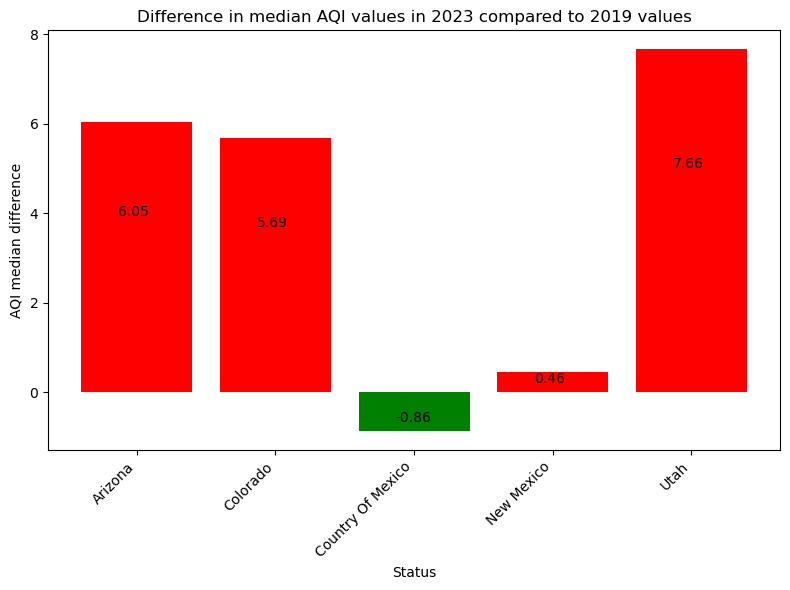

In [70]:
# list of colors based on 'Comparison' values
colors = ['red' if comp > 0 else 'green' for comp in merge_5worst2019_2023['Comparison']]

# graph
plt.figure(figsize=(8, 6))
bars = plt.bar(merge_5worst2019_2023['State Name'], merge_5worst2019_2023['Comparison'], color=colors)

# labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/3.0, height/1.5, f'{height:.2f}', ha='left', va='center')

# axis title and label
plt.title('Difference in median AQI values ​​in 2023 compared to 2019 values')
plt.xlabel('Status')
plt.ylabel('AQI median difference')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### <font color='green'> __ANALYSIS__
    - The state of Utah had the largest increase in the median AQI in 2023 compared to 2019 values, compared to the other selected states

#### Correlation between the columns '1st Max Value AQI' and '1st Max Hour' to understand at which time the highest AQI values ​​of the day are being recorded - 2019 

In [71]:
# median of '1st Max Value AQI' for each '1st Max Hour'
median_per_hour_2019 = ozone_2019.groupby('1st Max Hour')['1st Max Value AQI'].median()
median_per_hour_2019 = median_per_hour_2019.sort_index()

#### Graph displaying the correlation between the highest AQI values ​​recorded on the day and the time of day these values ​​were captured

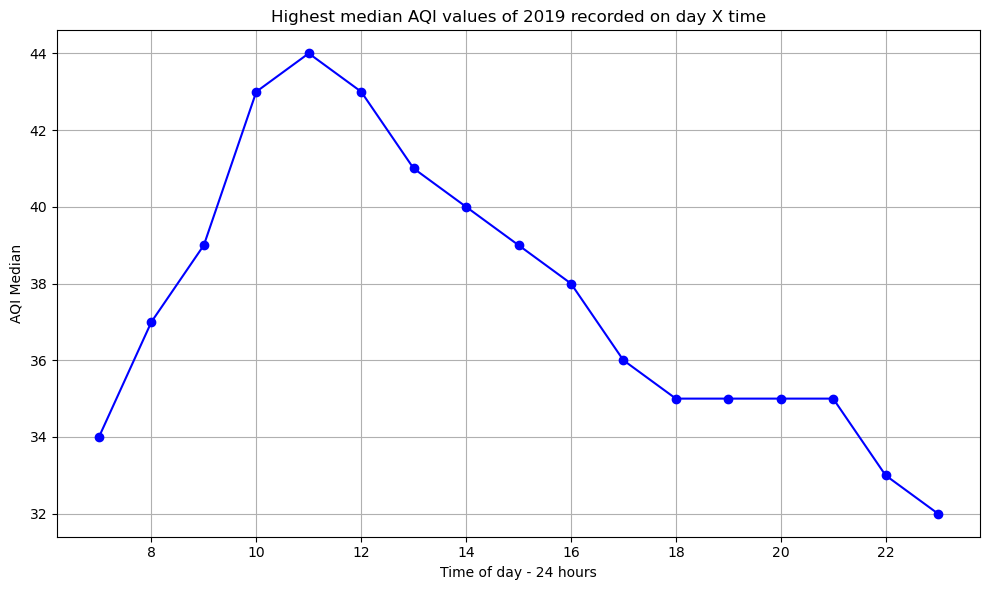

In [72]:
# graph
plt.figure(figsize=(10, 6))
plt.plot(median_per_hour_2019.index, median_per_hour_2019.values, marker='o', color='blue', linestyle='-')

# axis titles and labels
plt.title('Highest median AQI values ​​of 2019 recorded on day X time')
plt.xlabel('Time of day - 24 hours')
plt.ylabel('AQI Median')

plt.grid(True)
plt.tight_layout()
plt.show()

#### Correlation between the columns '1st Max Value AQI' and '1st Max Hour' to understand at which time the highest AQI values ​​​​of the day are being recorded - 2023

In [73]:
# median of '1st Max Value AQI' for each '1st Max Hour'
median_per_hour_2023 = ozone_2023.groupby('1st Max Hour')['1st Max Value AQI'].median()
median_per_hour_2023 = median_per_hour_2023.sort_index()

#### Graph displaying the correlation between the highest AQI values ​​recorded on the day and the time of day these values ​​were captured 

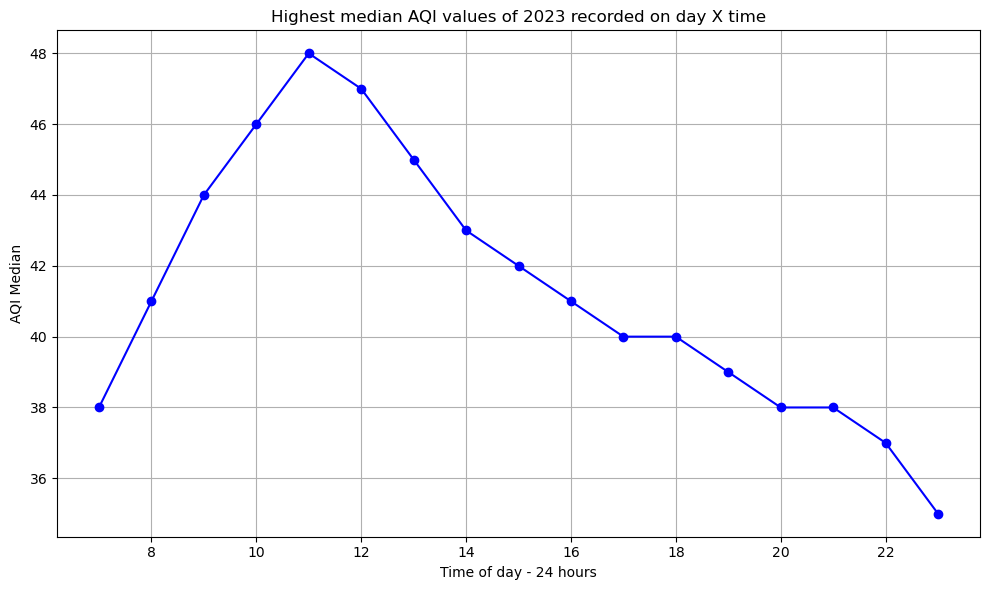

In [74]:
# graph
plt.figure(figsize=(10, 6))
plt.plot(median_per_hour_2023.index, median_per_hour_2023.values, marker='o', color='blue', linestyle='-')

# axis titles and labels
plt.title('Highest median AQI values of 2023 recorded on day X time')
plt.xlabel('Time of day - 24 hours')
plt.ylabel('AQI Median')

plt.grid(True)
plt.tight_layout()
plt.show()

#### <font color='green'> __ANALYSIS__
    - It is possible to verify that 11 am is the time when the highest median AQI values ​​were recorded in both 2019 and 2023

## <font color='green'> Data Analysis: </font> Carbon Monoxide

#### Check if my data in the AQI column has a normal distribution using the Kolmogorov-Smirnov test as I have more than 50 values 

In [75]:
#2019
stat, p_value = kstest(co_2019['AQI'], 'norm')

# comparing the p-value with a 0.05 significance level
if p_value > 0.05:
     print("The distribution is normal")
else:
     print("Distribution is not normal")

Distribution is not normal


#### Histogram to visualize the distribution of data in the AQI column in 2019

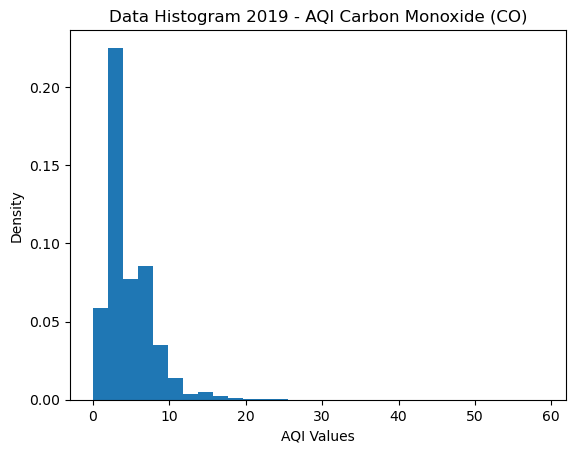

In [76]:
plt.hist(co_2019['AQI'], bins=30, density=True)
plt.title('Data Histogram 2019 - AQI Carbon Monoxide (CO)')
plt.xlabel('AQI Values')
plt.ylabel('Density')
plt.show()

In [77]:
#2019
stat, p_value = kstest(co_2023['AQI'], 'norm')

# comparing the p-value with a 0.05 significance level
if p_value > 0.05:
     print("The distribution is normal")
else:
     print("Distribution is not normal")

Distribution is not normal


#### Histogram to visualize the distribution of data in the AQI column in the year 2023

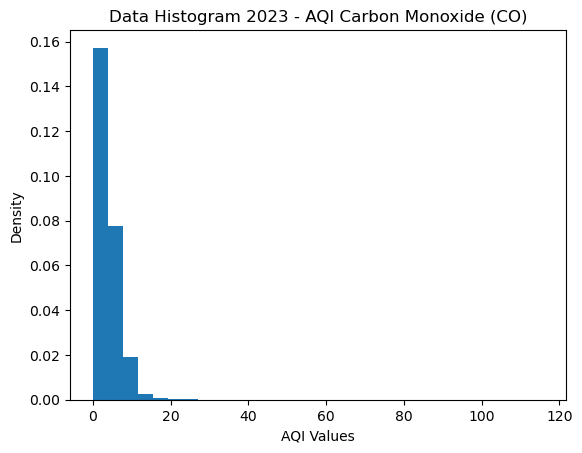

In [78]:
plt.hist(co_2023['AQI'], bins=30, density=True)
plt.title('Data Histogram 2023 - AQI Carbon Monoxide (CO)')
plt.xlabel('AQI Values')
plt.ylabel('Density')
plt.show()

#### Median AQI per month

In [79]:
#2019
median2019 = co_2019.pivot_table(index='Month', values='AQI', aggfunc='mean').round(1).reset_index()
#2023
median2023 = co_2023.pivot_table(index='Month', values='AQI', aggfunc='mean').round(1).reset_index()

# organization from highest value to lowest
median2019 = median2019.sort_values(by='Month')
median2023 = median2023.sort_values(by='Month')

# definition of the new line that will be added
new_line = {'Month': 'Dec', 'AQI': 0}

# adding the new line to the median2023 dataframe
median2023 = median2023.append(new_line, ignore_index=True)

C:\Users\je_gr\AppData\Local\Temp\ipykernel_15472\1415211905.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  median2023 = median2023.append(new_line, ignore_index=True)


#### Chart comparing the medians for each month in 2019 and 2023 

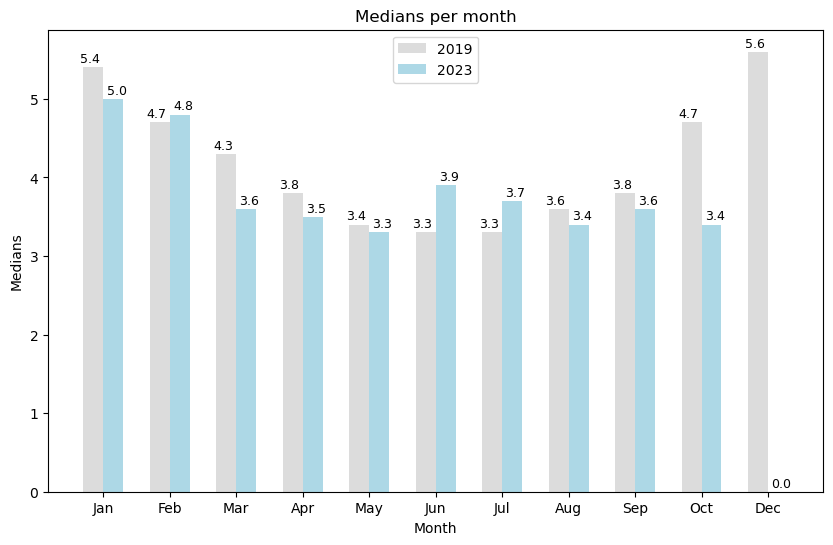

In [80]:
# combining the dataframes median2029 and median2023 into a single dataframe
df_combined = pd.merge(median2019, median2023, on='Month')

# indexes for months
indices = np.arange(len(df_combined))

bar_width = 0.30
plt.figure(figsize=(10, 6))

# graph
bars1 = plt.bar(indices - bar_width/2, df_combined['AQI_x'], bar_width, label='2019', color=(220/255, 220/255, 220/255))
bars2 = plt.bar(indices + bar_width/2, df_combined['AQI_y'], bar_width, label='2023', color=(173/255, 216/255, 230/255))

# labels, titles and caption
plt.xlabel('Month')
plt.ylabel('Medians')
plt.title('Medians per month')
plt.xticks(indices, df_combined['Month'])
plt.legend()

# adding labels
for bar1, bar2 in zip(bars1, bars2):
 plt.text(bar1.get_x() + bar1.get_width()/2 - 0.05, bar1.get_height() + 0.06, str(bar1.get_height()), ha='center', fontsize=9)
 plt.text(bar2.get_x() + bar2.get_width()/2 + 0.05, bar2.get_height() +0.06, str(bar2.get_height()), ha='center', fontsize=9)

plt.show()

#### <font color='green'> __ANALYSIS__
    - For the year 2019, the months of January, February and October have the highest medians in the presence of the pollutant
    - For the year 2023, the months of January and February have the highest medians in the presence of the pollutant
    - Only in the months of February, June and July was the median pollutant higher in 2023 compared to 2019. In the other months the pollutant was lower compared to 2019.


    Note: There are no records for the months of November and December for 2023

## <font color='green'> Data analysis: </font> all pollutants

In [81]:
# checking which city has the highest AQI value for the pollutant Ozone in 2023
ozone_maxAQI_2023 = ozone_2023[['State Name', 'City Name', 'AQI', 'Month']].copy()
ozone_maxAQI_2023.sort_values(by='AQI', ascending=False)

,State Name,City Name,AQI,Month
38902,Colorado,Denver,217,Jul
191603,Utah,Not in a city,215,Feb
194795,Utah,Not in a city,215,Feb
191331,Utah,Roosevelt,213,Feb
191059,Utah,Roosevelt,207,Feb
...,...,...,...,...
12478,Arkansas,North Little Rock,0,Jan
131398,New Mexico,Shiprock,0,Jan
131397,New Mexico,Shiprock,0,Jan
131396,New Mexico,Shiprock,0,Jan


In [82]:
# saving only the data corresponding to the city of Denver in 2023
ozone_maxAQI_2023_denver = ozone_2023.loc[ozone_maxAQI_2023['City Name'] == 'Denver']
co_maxAQI_2023_denver = co_2023.loc[co_2023['City Name'] == 'Denver']
so2_maxAQI_2023_denver = so2_2023.loc[so2_2023['City Name'] == 'Denver']
no2_maxAQI_2023_denver = no2_2023.loc[no2_2023['City Name'] == 'Denver']

#### Quartiles of AQI data for the pollutant nitrogen dioxide in the city of Denver ¶

In [83]:
quartiles = np.percentile(no2_maxAQI_2023_denver['AQI'], [25, 50, 75])
quartiles

array([21., 31., 42.])

#### AQI quartile chart for the pollutant nitrogen dioxide in the city of Denver

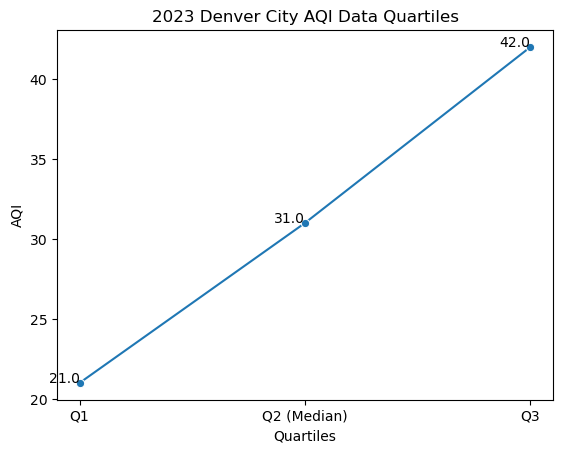

In [84]:
df_quartiles = pd.DataFrame({'Quartiles': ['Q1', 'Q2 (Median)', 'Q3'], 'AQI': quartiles})

# graph
sns.lineplot(data=df_quartiles, x='Quartiles', y='AQI', marker='o')

# adding labels
for index, row in df_quartiles.iterrows():
 plt.text(row['Quartiles'], row['AQI'], str(row['AQI']), ha='right')

# chart title
plt.title('2023 Denver City AQI Data Quartiles')

plt.show()

#### Calculation of the median of all pollutants in the year 2023

In [85]:
ozone_median2023 = ozone_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
co_median2023 = co_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
so2_median2023 = so2_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
no2_median2023 = no2_2023.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()

#### Deletion of data for the month of November in the Carbon Monoxide pollutant dataframe 

* This exclusion was done to match the months in all dataframes.
* All dataframes have data from January to September. The only one that has extra information is the dataframe relating to the CO pollutant and only for the month of November.

In [86]:
month_to_delete = ['Nov', 'Oct']
lines_to_delete = co_median2023[co_median2023.apply(lambda row: any(row.str.contains('|'.join(month_to_delete))), axis=1)].index

# deletion of lines with information in November
co_median2023 = co_median2023.drop(lines_to_delete)

#### Graph comparing the median AQI value of all pollutants from January to September 2023 in all states 

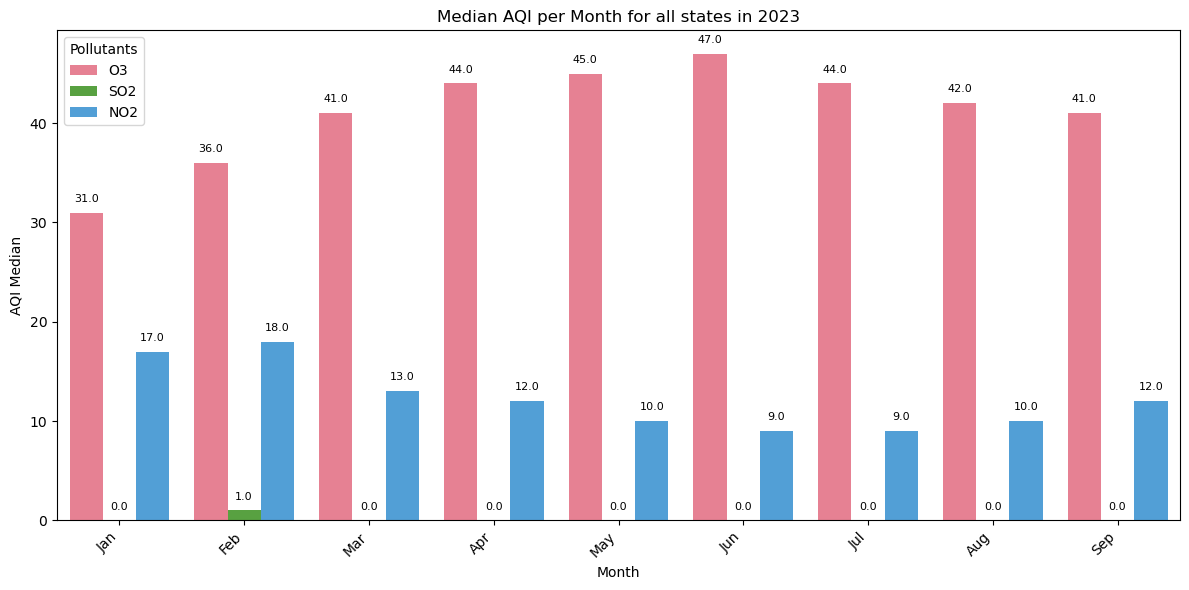

In [87]:
# concatenate all the bases of the AQI medians of all pollutants
df_median_concat = pd.concat([ozone_median2023, co_median2023, so2_median2023, no2_median2023], keys=['O3', 'CO', 'SO2', 'NO2'])

# reset the index to be able to access 'State Name' as a column
df_median_concat = df_median_concat.reset_index(level=0).rename(columns={'level_0': 'DF'})

# converting the categorical column to text because I was reading unnecessary information from the months of Nov and Dec
df_median_concat['Month'] = df_median_concat['Month'].astype(str)

# graph
plt.figure(figsize=(12, 6))
sns.barplot(data=df_median_concat, x='Month', y='AQI', hue='DF', palette='husl')

# labels, titles and caption
plt.title('Median AQI per Month for all states in 2023')
plt.xlabel('Month')
plt.ylabel('AQI Median')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pollutants')
plt.tight_layout()

# adding labels
for p in plt.gca().patches:
     plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.show()

#### <font color='green'> __ANALYSIS__
    - Ozone: it is possible to notice that the pollutant increased throughout the year, reaching its peak in June. Even after a drop starting in July, it did not return to its initial value in January.
    - CO and SO2: showed a decrease in the median AQI throughout the year in relation to the average AQI in January.
    - NO2: showed a decrease in the median AQI throughout the year from March onwards, compared to the initial values ​​in January and February

## <font color='green'> Data Analysis: </font> 2023 AQI median in the city of Denver

In [88]:
ozone_median_2023_denver = ozone_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
co_median_2023_denver = co_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
so2_median_2023_denver = so2_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()
no2_median_2023_denver = no2_maxAQI_2023_denver.pivot_table(index='Month', values='AQI', aggfunc='median').round(1).reset_index()

#### Deletion of data for the month of September in the Carbon Monoxide pollutant dataframe 

* This exclusion was done to match the months in all dataframes.
* All dataframes have data from January to August. The only one that has extra information is the dataframe relating to the CO pollutant and only for the month of September.

In [89]:
co_median_2023_denver = co_median_2023_denver[co_median_2023_denver['Month'] != 'Sep']

#### Graph comparing the median AQI value of all pollutants from January to August 2023 in the city of Denver 

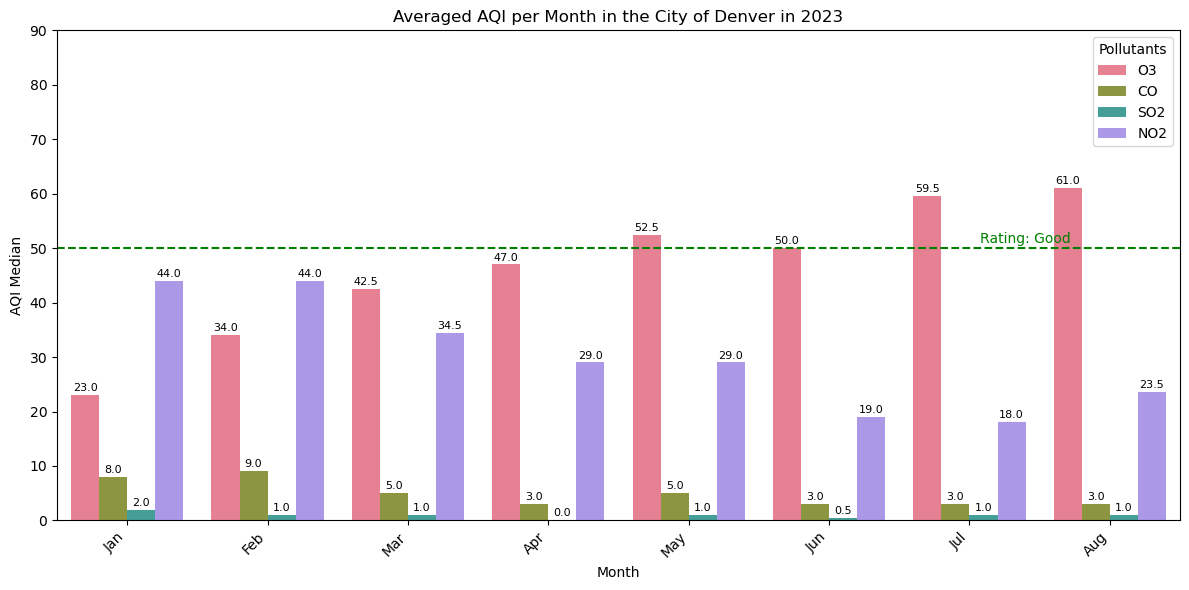

In [90]:
# concatenate all bases of AQI averages of all pollutants
df_median_concat_denver = pd.concat([ozone_median_2023_denver, co_median_2023_denver, so2_median_2023_denver, no2_median_2023_denver], keys=['O3', 'CO', 'SO2', 'NO2'])

# reset the index to be able to access 'State Name' as a column
df_median_concat_denver = df_median_concat_denver.reset_index(level=0).rename(columns={'level_0': 'DF'})

# converting the categorical column to text because I was reading unnecessary information from the months of Nov and Dec
df_median_concat_denver['Month'] = df_median_concat_denver['Month'].astype(str)

# graph
plt.figure(figsize=(12, 6))
sns.barplot(data=df_median_concat_denver, x='Month', y='AQI', hue='DF', palette='husl')

plt.ylim(0, 90)

# labels, titles and caption
plt.title('Averaged AQI per Month in the City of Denver in 2023')
plt.xlabel('Month')
plt.ylabel('AQI Median')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pollutants')
plt.tight_layout()


# adding value sorting line
plt.axhline(y=50, color='g', linestyle='--')
plt.text(len(df_median_concat_denver)/5, 51, f'Rating: Good', ha='center', color='g')

# adding labels
for p in plt.gca().patches:
     plt.gca().annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

#### <font color='green'> __ANALYSIS__
    - SO2 and CO pollutants fell and remained low in their median AQI over the months.
    - Ozone: the median AQI of this pollutant increased significantly (almost tripled) from January to August.
    - NO2: there was a drop in this pollutant throughout the year, reducing the median AQI in August by practically half compared to January.